In [14]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
from tqdm.notebook import tqdm
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

In [16]:
trf = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [17]:
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=trf)
val_set = datasets.MNIST(root='./data', train=False, download=True, transform=trf)

In [18]:
BATCH_SIZE = 32
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

In [19]:
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16*4*4, 120),
            nn.Tanh(),
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [20]:
model = LeNet5().to(DEVICE)
model

LeNet5(
  (features): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [22]:
train_loss_arr = []
val_loss_arr = []

train_acc_arr = []
val_acc_arr = []


In [23]:
NUM_EPOCHS = 20

for epoch in range(NUM_EPOCHS):
    print(f"EPOCH: {epoch+1}/{NUM_EPOCHS}-----------------------------")

    train_loss = 0.0
    train_crct = 0

    val_loss = 0.0
    val_crct = 0

    model.train(True)
    for i, (X, y) in enumerate(tqdm(train_loader)):
        X = X.to(DEVICE)
        y = y.to(DEVICE)
        optimizer.zero_grad()
        y_hat = model(X)
        loss = loss_fn(y_hat, y)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            train_loss += loss.item()
            train_crct += (torch.max(y_hat.data, 1)[1] == y).sum().item()
    train_loss_arr.append(train_loss/(BATCH_SIZE*(i+1)))
    train_acc_arr.append(train_crct/(BATCH_SIZE*(i+1)))
    print(f"train loss: {train_loss/(BATCH_SIZE*(i+1))}, train acc: {train_crct/(BATCH_SIZE*(i+1))}")

    model.eval()
    with torch.no_grad():
        for i, (X, y) in enumerate(tqdm(val_loader)):
            X = X.to(DEVICE)
            y = y.to(DEVICE)
            y_hat = model(X)
            loss = loss_fn(y_hat, y)
            val_loss += loss.item()
            val_crct += (torch.max(y_hat.data, 1)[1] == y).sum().item()
    val_loss_arr.append(val_loss/(BATCH_SIZE*(i+1)))
    val_acc_arr.append(val_crct/(BATCH_SIZE*(i+1)))
    print(f"val loss: {val_loss/(BATCH_SIZE*(i+1))}, val acc: {val_crct/(BATCH_SIZE*(i+1))}\n\n")


EPOCH: 1/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.032808292738596596, train acc: 0.7019333333333333


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.009848910999058868, val acc: 0.9138378594249201


EPOCH: 2/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.007685520961880684, train acc: 0.9326833333333333


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0053125119331246685, val acc: 0.9527755591054313


EPOCH: 3/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.004878372944177439, train acc: 0.9554666666666667


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0037850223998829257, val acc: 0.9639576677316294


EPOCH: 4/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.003641891447470213, train acc: 0.9667833333333333


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0030239831630926067, val acc: 0.97064696485623


EPOCH: 5/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0029544551288088164, train acc: 0.9728


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0025318922253819136, val acc: 0.9748402555910544


EPOCH: 6/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0025255207237244275, train acc: 0.9768


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.002269884648423392, val acc: 0.9767372204472844


EPOCH: 7/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.002233095490070991, train acc: 0.9790333333333333


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0020198434800482927, val acc: 0.9777356230031949


EPOCH: 8/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.002011676916705134, train acc: 0.9813166666666666


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0018759208309603447, val acc: 0.979632587859425


EPOCH: 9/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0018372175812837667, train acc: 0.9829833333333333


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.001742641648307674, val acc: 0.981629392971246


EPOCH: 10/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.001692399040008119, train acc: 0.9841666666666666


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0016534656689718207, val acc: 0.9820287539936102


EPOCH: 11/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.001572436236330153, train acc: 0.9855333333333334


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0015859843252008013, val acc: 0.9825279552715654


EPOCH: 12/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0014806750127871054, train acc: 0.9863166666666666


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.001508712088955838, val acc: 0.9832268370607029


EPOCH: 13/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0013835835505238113, train acc: 0.9871


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0014800219277343314, val acc: 0.983426517571885


EPOCH: 14/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0013027799683564807, train acc: 0.98855


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.001409012513854156, val acc: 0.9846246006389776


EPOCH: 15/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0012291277804120909, train acc: 0.98905


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0014610141070863956, val acc: 0.983526357827476


EPOCH: 16/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0011673916595832754, train acc: 0.9896666666666667


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0013607994525501998, val acc: 0.9845247603833865


EPOCH: 17/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0011167226842818006, train acc: 0.9902166666666666


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0013449579191176756, val acc: 0.9850239616613419


EPOCH: 18/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0010673677604820114, train acc: 0.9907


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0012826058105383127, val acc: 0.985223642172524


EPOCH: 19/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0010126981599712357, train acc: 0.9912333333333333


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0012908966659677553, val acc: 0.985223642172524


EPOCH: 20/20-----------------------------


  0%|          | 0/1875 [00:00<?, ?it/s]

train loss: 0.0009647285630771269, train acc: 0.9914333333333334


  0%|          | 0/313 [00:00<?, ?it/s]

val loss: 0.0012701522281918115, val acc: 0.9858226837060703




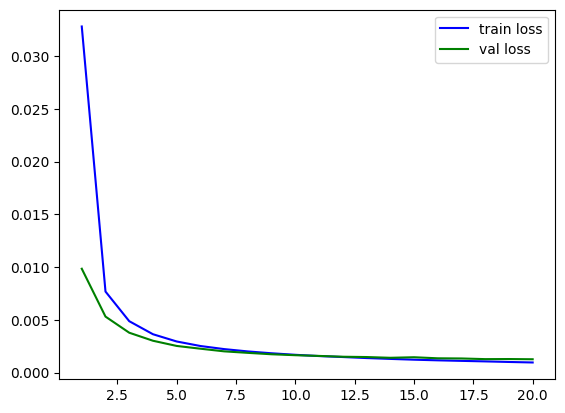

In [24]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_arr, 'b', label='train loss')
plt.plot(range(1, NUM_EPOCHS+1), val_loss_arr, 'g', label='val loss')
plt.legend()

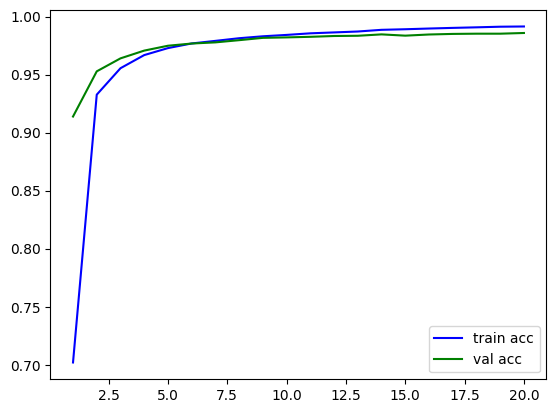

In [25]:
plt.plot(range(1, NUM_EPOCHS+1), train_acc_arr, 'b', label='train acc')
plt.plot(range(1, NUM_EPOCHS+1), val_acc_arr, 'g', label='val acc')
plt.legend()

In [26]:
n = 10
for i in range(n):
    X, y = val_set[torch.randint(low=0, high=len(val_set), size=(1,)).item()]
    X = torch.unsqueeze(X, 0).to(DEVICE)

    yhat = model(X)
    print("Pred:", torch.max(yhat.data, 1)[1].item(), end="\t\t")
    print("true:", y)


Pred: 0		true: 0
Pred: 4		true: 4
Pred: 0		true: 0
Pred: 4		true: 4
Pred: 0		true: 0
Pred: 8		true: 8
Pred: 5		true: 5
Pred: 5		true: 5
Pred: 2		true: 2
Pred: 4		true: 4
